<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 25px"> Import Libraries </span>

In [1]:
import python_utils.common_utils as cu
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
%run ../visualizations/plottings.ipynb
warnings.filterwarnings('ignore')

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 25px"> Load Dataset </span>

In [2]:
df = cu.load_df("parquet", "pd", "../../dataset/compressed/ozone_hourly_2014.parquet")
df.head(10).T


,0,1,2,3,4,5,6,7,8,9
state_code,01,01,01,01,01,01,01,01,01,01
county_code,003,003,003,003,003,003,003,003,003,003
poc,1,1,1,1,1,1,1,1,1,1
date_local,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01
time_local,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,10:00
date_gmt,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01,2014-03-01
time_gmt,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00
sample_measurement,0.047,0.047,0.043,0.038,0.035,0.035,0.034,0.037,0.044,0.046
units_of_measure,Parts per million,Parts per million,Parts per million,Parts per million,Parts per million,Parts per million,Parts per million,Parts per million,Parts per million,Parts per million
mdl,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 25px"> Aggregating Statistics </span>

**♦ Analyzing Data Structure:**

• Using the `info() function` to view information that contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9037917 entries, 0 to 9037916
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   state_code           object 
 1   county_code          object 
 2   poc                  int32  
 3   date_local           object 
 4   time_local           object 
 5   date_gmt             object 
 6   time_gmt             object 
 7   sample_measurement   float64
 8   units_of_measure     object 
 9   mdl                  float64
 10  qualifier            object 
 11  method_type          object 
 12  method_code          int32  
 13  method_name          object 
 14  state_name           object 
 15  county_name          object 
 16  date_of_last_change  object 
dtypes: float64(2), int32(2), object(13)
memory usage: 1.1+ GB


• Next task is to check the counts the number of not empty values for each row using the `count() function`.

In [3]:
df.count()

state_code             9037917
county_code            9037917
poc                    9037917
date_local             9037917
time_local             9037917
date_gmt               9037917
time_gmt               9037917
sample_measurement     9037917
units_of_measure       9037917
mdl                    9037917
qualifier              9037917
method_type            9037917
method_code            9037917
method_name            9037917
state_name             9037917
county_name            9037917
date_of_last_change    9037917
dtype: int64

• The `describe() function` is a great tool to return the description of the data in the DataFrame. Given that the DataFrame contains numerical data, the description contains these information for each column: \
* count - the number of not-empty values. 
* mean - The average (mean) value. 
* std - The standard deviation. 
* min - the minimum value. 
* 25% - The 25% percentile. 
* 50% - The 50% percentile. 
* 75% - The 75% percentile. 
* max - the maximum value. 


In [7]:
numerical_columns = df.select_dtypes(include=['int32', 'float64'])
numerical_columns

,poc,sample_measurement,mdl,method_code
0,1,0.047,0.005,47
1,1,0.047,0.005,47
2,1,0.043,0.005,47
3,1,0.038,0.005,47
4,1,0.035,0.005,47
...,...,...,...,...
9037912,1,0.019,0.005,87
9037913,1,0.021,0.005,87
9037914,1,0.024,0.005,87
9037915,1,0.002,0.005,87


• Select all the Numerical columns to distinguish between the numerical and other discrete values.

In [9]:
numerical_columns.columns

Index(['poc', 'sample_measurement', 'mdl', 'method_code'], dtype='object')

• Another important step is to find the exact discrepency value between the largest and the lowest values of a variable.

In [10]:
def min_max(df):
    return df.max() - df.min()

• While it is possible to view the quantiles, standard deviation, maximum and minimum values for all values using `df.describe()`, there are some vital information that would still be helpful such as median value, variance, Min-Max discrepancy, mode value, and so forth. Therefore, it is a good practice to inspect all the information from individual numerical feature.

In [27]:
for column in numerical_columns:
    print(f"• {column} Attribute:\nTotal Rows {df.shape[0]}\nMedian   {df[column].median()}\nMode     {df[column].mode()[0]}\nVariance {round(df[column].var(),5)}\nMax-Min  {min_max(df[column])}\n{df[column].describe()}\n")


• poc Attribute:
Total Rows 9037917
Median   1.0
Mode     1
Variance 0.10753
Max-Min  5
count    9.037917e+06
mean     1.070348e+00
std      3.279214e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.000000e+00
Name: poc, dtype: float64

• sample_measurement Attribute:
Total Rows 9037917
Median   0.03
Mode     0.032
Variance 0.00023
Max-Min  0.081
count    9.037917e+06
mean     3.013781e-02
std      1.528778e-02
min     -5.000000e-03
25%      1.900000e-02
50%      3.000000e-02
75%      4.100000e-02
max      7.600000e-02
Name: sample_measurement, dtype: float64

• mdl Attribute:
Total Rows 9037917
Median   0.005
Mode     0.005
Variance 0.65391
Max-Min  7.9994
count    9.037917e+06
mean     1.348698e-01
std      8.086479e-01
min      6.000000e-04
25%      5.000000e-03
50%      5.000000e-03
75%      5.000000e-03
max      8.000000e+00
Name: mdl, dtype: float64

• method_code Attribute:
Total Rows 9037917
Median   87.0
Mode     87
Varianc

• The *mean* `poc` value is `1.070` approxiately with `0.10753` as *variance*, *median* of `1.0`, and *standard deviation* of `3.28e-01`. Similarly, the *mean* is `3.014e-02` with a *deviation* of `1.528778e-02` for `sample_measurement` with a `0.03` *median* and `0.00023` of *variance*. Lastly, the `mdl` attribute consists of a *variance* of `0.65391`, `1.35e-01` *mean*, a *median* of `0.005`, and `8.086e-0` of *std*. 
It is important to note that the `method_code` is not a value that falls under any operations as it only indicates the number in which the method is execute to acquire these readings.

• Even though Non-Numerical data do not require statistical inspection, the `categorical_columns.describe()` below still shows some important characteristics such as occurance, unique values count, top and frequency values, which would add further insights about the nature of the data.

In [5]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

,state_code,county_code,date_local,time_local,date_gmt,time_gmt,units_of_measure,qualifier,method_type,method_name,state_name,county_name,date_of_last_change
0,01,003,2014-03-01,01:00,2014-03-01,07:00,Parts per million,None,FEM,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
1,01,003,2014-03-01,02:00,2014-03-01,08:00,Parts per million,None,FEM,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
2,01,003,2014-03-01,03:00,2014-03-01,09:00,Parts per million,None,FEM,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
3,01,003,2014-03-01,04:00,2014-03-01,10:00,Parts per million,None,FEM,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
4,01,003,2014-03-01,05:00,2014-03-01,11:00,Parts per million,None,FEM,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037912,80,006,2014-08-31,19:00,2014-09-01,02:00,Parts per million,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Country Of Mexico,CHIHUAHUA STATE,2015-06-09
9037913,80,006,2014-08-31,20:00,2014-09-01,03:00,Parts per million,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Country Of Mexico,CHIHUAHUA STATE,2015-06-09
9037914,80,006,2014-08-31,21:00,2014-09-01,04:00,Parts per million,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Country Of Mexico,CHIHUAHUA STATE,2015-06-09
9037915,80,006,2014-08-31,22:00,2014-09-01,05:00,Parts per million,None,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Country Of Mexico,CHIHUAHUA STATE,2015-06-09


In [29]:
categorical_columns.describe().T

,count,unique,top,freq
state_code,9037917,53,06,1378049
county_code,9037917,138,013,410201
date_local,9037917,365,2014-05-18,30134
time_local,9037917,24,20:00,385956
date_gmt,9037917,366,2014-05-10,30108
time_gmt,9037917,24,02:00,385095
units_of_measure,9037917,1,Parts per million,9037917
qualifier,9037917,20,None,8915634
method_type,9037917,2,FEM,9022312
method_name,9037917,8,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,4472516


**♦ Statistical Analysis:**

• A `Bar plot` is drawn to illustrate the POC variable. More in-depth of each variable will be visually explored in the `feature_exploration` ipynb.

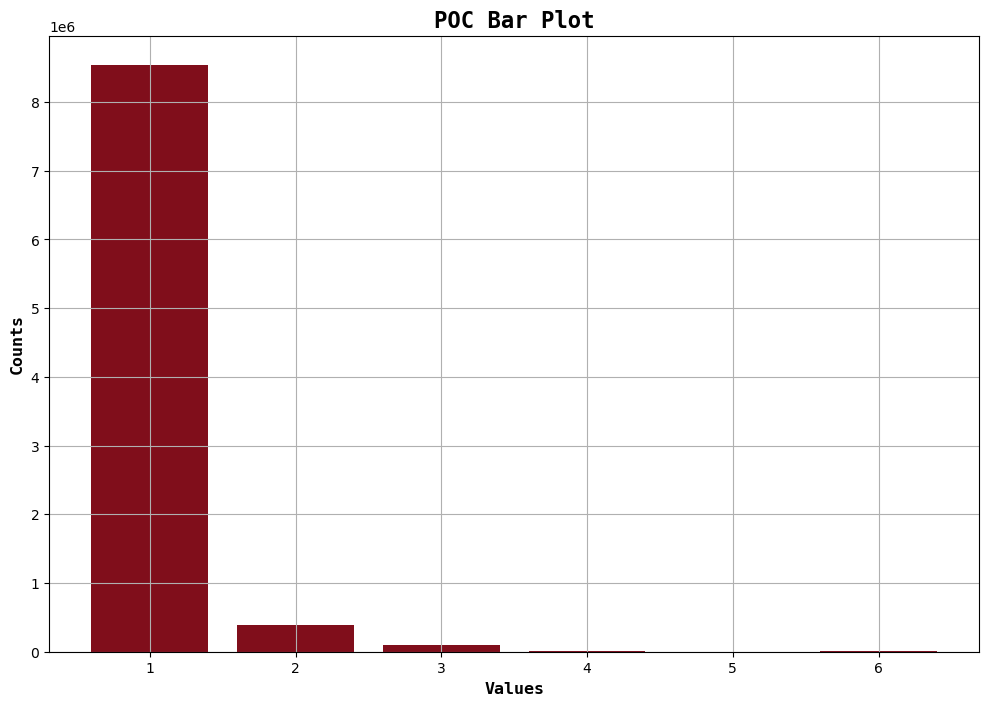

In [83]:
poc_dict = dict(df['poc'].value_counts())
x = np.array(list(poc_dict.keys()))
y = np.array([poc_dict[value] for value in poc_dict])
labels = ['POC Bar Plot', 'Values', 'Counts']

plot_bar(x, y, h_orientation=False, labels=labels)

• Checking the list of values greater than its mean.

In [66]:
df['poc'].unique()

array([1, 2, 6, 3, 4])

In [23]:
print(f"Mean value of poc is {round(df['poc'].mean(), 4)}")

print("\nListing the variables that are higher than the overall average poc value:")
df[['poc']].where(df['poc'] >= df['poc'].mean()).dropna().value_counts()


Mean value of poc is 1.0703

Listing the variables that are higher than the overall average poc value:


poc
2.0    395130
3.0     93179
6.0      8582
4.0      3800
Name: count, dtype: int64

• Displaying the index distribution for each categorical values of `poc`.

In [25]:
df['poc'].unique()

array([1, 2, 6, 3, 4])

In [22]:
df.groupby(by='poc').groups


{1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 2: [1388094, 1388095, 1388096, 1388097, 1388098, 1388099, 1388100, 1388101, 1388102, 1388103, 1388104, 1388105, 1388106, 1388107, 1388108, 1388109, 1388110, 1388111, 1388112, 1388113, 1388114, 1388115, 1388116, 1388117, 1388118, 1388119, 1388120, 1388121, 1388122, 1388123, 1388124, 1388125, 1388126, 1388127, 1388128, 1388129, 1388130, 1388131, 1388132, 1388133, 1388134, 1388135, 1388136, 1388137, 1388138, 1388139, 1388140, 1388141, 1388142, 1388143, 1388144, 1388145, 1388146, 1388147, 1388148, 1388149, 1388150, 1388151, 1388152, 1388153, 1388154, 1388155, 1388156, 1388157, 1388158, 1388159, 1

• Histogram is plotted to show the distribution of `sample_measurement` variable.

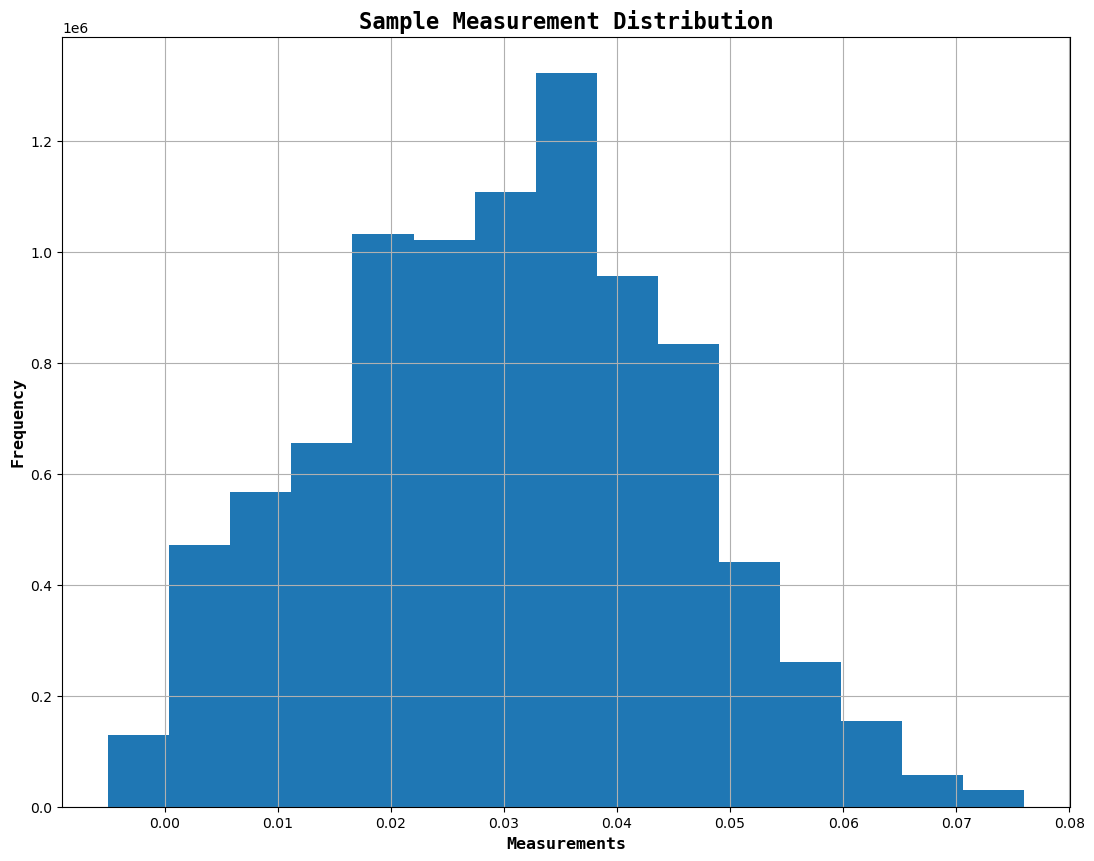

In [95]:
plot_hist(df['sample_measurement'], labels=["Sample Measurement Distribution", "Measurements", "Frequency"])

• Since there are many unique values for `sample_measurement`, checking the counts is necessary to keep track. 

In [26]:
df['sample_measurement'].nunique()

82

• Find the values greater than mean for `sample_measurement` along with its size. In this case, the size is `46`, which indicates that more than 50% *(56.09% to be exact)* values falls under greater than the mean value. Therefore, the values with the low count might have a strong possibility of being an outlier.

In [63]:
greater_than_mean = df[['sample_measurement']].where(df['sample_measurement'] >= df['sample_measurement'].mean()).dropna().value_counts()
print("Value count: ",len(greater_than_mean), "\n", greater_than_mean)


Value count:  46 
 sample_measurement
0.032                 225200
0.033                 225117
0.034                 224500
0.031                 224032
0.035                 222868
0.036                 219681
0.037                 216856
0.038                 212529
0.039                 206829
0.040                 200530
0.041                 191370
0.042                 183051
0.043                 174247
0.044                 164574
0.045                 154858
0.046                 143676
0.047                 133412
0.048                 123819
0.049                 113933
0.050                 104766
0.051                  96098
0.052                  88501
0.053                  79995
0.054                  72308
0.055                  64886
0.056                  58175
0.057                  51710
0.058                  45585
0.059                  40483
0.060                  35378
0.061                  31114
0.062                  27029
0.063                  23267
0.064

• Displaying the index distribution for each unique values of `sample_measurement`.

In [56]:
df.groupby(by='sample_measurement').groups


{-0.005: [3459806, 4101006, 4101007, 4101008, 4101009, 4101010], -0.004: [1398208, 3043881, 3722052, 3726620, 3763869, 4016519, 4101005, 4101102, 4101103, 4101104, 4131548, 4143390, 6408001, 6454879, 6766790, 6766791, 6766792, 6766793, 6766794, 6766795, 6766796, 6766797, 8161695, 8161700, 8161701, 8161702, 8507882, 8507969], -0.003: [815322, 815345, 815347, 815351, 815352, 815627, 972331, 1276936, 1276959, 1277228, 1277229, 1277350, 1297123, 3043785, 3043880, 3043882, 3719961, 3721720, 3725331, 3725332, 3725333, 3726544, 3726567, 3762679, 3763867, 3763868, 3764180, 3764892, 4016518, 4101003, 4101004, 4101195, 4101196, 4101197, 4101198, 4132585, 4143388, 4143389, 4154221, 4154222, 4154269, 4154270, 4154553, 4154575, 4154576, 4154577, 4154811, 4154837, 4154859, 4154860, 4154861, 4154908, 4154978, 4157430, 6407500, 6407999, 6408000, 6766788, 6766789, 6766798, 7880430, 8060973, 8135427, 8161696, 8161699, 8165442, 8165443, 8172848, 8172850, 8172851, 8172852, 8172854, 8172857, 8507876, 85078

• The `mdl` is displayed to a `horizontal plot` to illustrate its distribution bar.

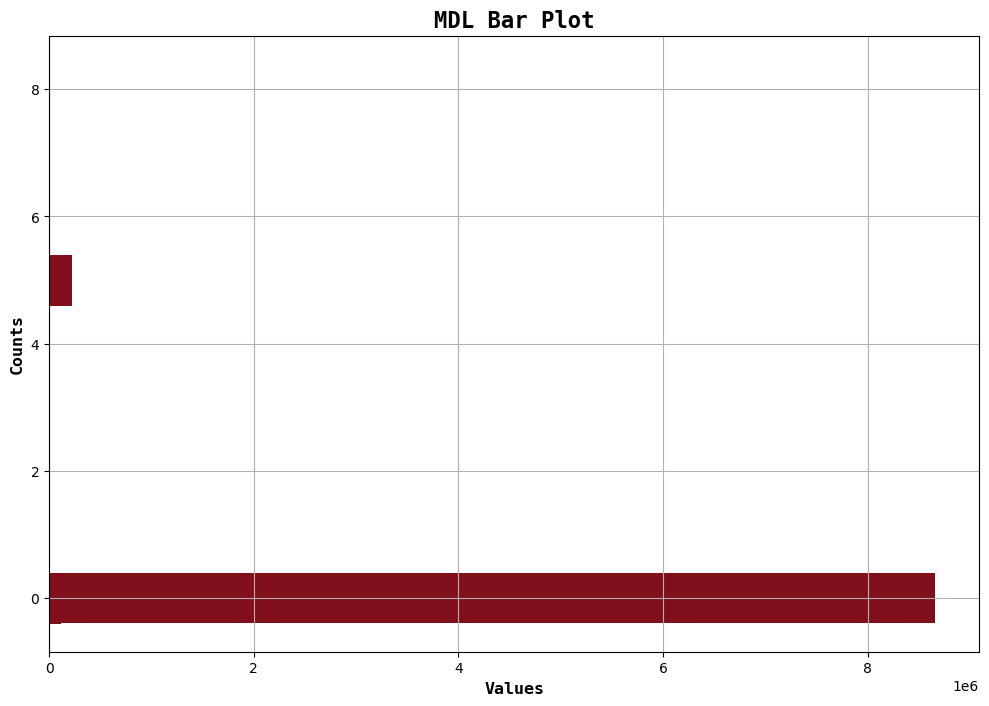

In [110]:
poc_dict = dict(df['mdl'].value_counts())
x = np.array(list(poc_dict.keys()))
y = np.array([poc_dict[value] for value in poc_dict])
labels = ['MDL Bar Plot', 'Values', 'Counts']

plot_bar(x, y, h_orientation=True, labels=labels)

• Values of `mdl` that are higher than its mean.

In [27]:
print(f"Mean value of mdl is {round(df['mdl'].mean(), 4)}")

print("\nListing the variables that are higher than the overall average poc value:")
df[['mdl']].where(df['mdl'] >= df['mdl'].mean()).dropna().value_counts()


Mean value of mdl is 0.1349

Listing the variables that are higher than the overall average poc value:


mdl
5.0    221865
8.0      8243
Name: count, dtype: int64

• Lastly, the index distribution for each unique values of `mdl`.

In [54]:
df.groupby(by='mdl').groups

{0.0006: [1035153, 1035154, 1035155, 1035156, 1035157, 1035158, 1035159, 1035160, 1035161, 1035162, 1035163, 1035164, 1035165, 1035166, 1035167, 1035168, 1035169, 1035170, 1035171, 1035172, 1035173, 1035174, 1035175, 1035176, 1035177, 1035178, 1035179, 1035180, 1035181, 1035182, 1035183, 1035184, 1035185, 1035186, 1035187, 1035188, 1035189, 1035190, 1035191, 1035192, 1035193, 1035194, 1035195, 1035196, 1035197, 1035198, 1035199, 1035200, 1035201, 1035202, 1035203, 1035204, 1035205, 1035206, 1035207, 1035208, 1035209, 1035210, 1035211, 1035212, 1035213, 1035214, 1035215, 1035216, 1035217, 1035218, 1035219, 1035220, 1035221, 1035222, 1035223, 1035224, 1035225, 1035226, 1035227, 1035228, 1035229, 1035230, 1035231, 1035232, 1035233, 1035234, 1035235, 1035236, 1035237, 1035238, 1035239, 1035240, 1035241, 1035242, 1035243, 1035244, 1035245, 1035246, 1035247, 1035248, 1035249, 1035250, 1035251, 1035252, ...], 0.0015: [2068562, 2068563, 2068564, 2068565, 2068566, 2068567, 2068568, 2068569, 206

• Observing the number of recordings taken on dates for `date_gmt`.

In [29]:
print(f"Unique {df['date_gmt'].nunique()}\n{df['date_gmt'].head()}")
print('\n', df['date_gmt'].value_counts(ascending=False))


Unique 366
0    2014-03-01
1    2014-03-01
2    2014-03-01
3    2014-03-01
4    2014-03-01
Name: date_gmt, dtype: object

 date_gmt
2014-05-10    30108
2014-05-24    30106
2014-05-23    30105
2014-09-20    30079
2014-06-28    30051
              ...  
2014-01-06    17567
2014-01-31    17553
2014-01-07    17438
2014-01-01    13266
2015-01-01     4861
Name: count, Length: 366, dtype: int64


• Checking the maximum discrepancies for the number of recordings for days.

In [34]:
date_value_counts = value_counts()
print(min_max(df['date_gmt'].value_counts()))


25247


• It is worth considering the effect of time on the readings, especially `sample_measurement`, which theoretically, could see alterations over different periods of hour.

In [4]:
record_dict = {}
time_lists = list(df['time_local'].unique())

for time in time_lists:
    record_dict[time] = dict(df[['sample_measurement', 'poc', 'mdl']].where(df['time_local']==time).dropna().mean())
    
pd.DataFrame(record_dict).T


,sample_measurement,poc,mdl
01:00,0.023383,1.069581,0.144744
02:00,0.022401,1.071499,0.148882
03:00,0.021985,1.074729,0.143940
04:00,0.020806,1.073629,0.013688
05:00,0.019413,1.070161,0.139563
06:00,0.019525,1.070175,0.139854
07:00,0.022238,1.069996,0.140019
08:00,0.026671,1.070147,0.140261
09:00,0.031299,1.070276,0.140273
10:00,0.035233,1.070343,0.139983


• Similar to tests recorded in a single day, it equally imperative to check the exact hour where the number of experiments are conducted the most.

In [62]:
print(f"Unique number of hours recorded: {df['time_local'].nunique()}")
df['time_local'].value_counts().sort_values(ascending=False)


Unique number of hours recorded: 24


time_local
20:00    385956
19:00    385799
21:00    384842
18:00    384672
05:00    383801
17:00    383626
06:00    383482
16:00    382045
07:00    381994
15:00    380444
08:00    379203
14:00    378861
13:00    377635
11:00    377326
09:00    377325
10:00    376795
12:00    376614
22:00    374940
23:00    373132
01:00    370099
00:00    368765
02:00    359629
04:00    357577
03:00    353355
Name: count, dtype: int64

• Similar to `time_local`, several similar queries are performed with other numerical variable as well.

In [45]:
df.groupby('poc')['sample_measurement'].mean().sort_values(ascending=False)

poc
4    0.037964
3    0.031225
1    0.030250
2    0.027496
6    0.024877
Name: sample_measurement, dtype: float64

In [44]:
df.groupby('mdl')['sample_measurement'].mean().sort_values(ascending=False)

mdl
0.0030    0.040641
5.0000    0.032529
0.0050    0.029945
0.0015    0.028814
8.0000    0.028728
0.0006    0.025730
Name: sample_measurement, dtype: float64

In [46]:
df.groupby('method_name')['sample_measurement'].mean().sort_values(ascending=False)

method_name
Instrumental - UV absorption photometry/UV 2B model 202 and 205    0.040641
INSTRUMENTAL - ULTRAVIOLET RADIATION ABSORBTN                      0.030562
INSTRUMENTAL - ULTRA VIOLET ABSORPTION                             0.030198
INSTRUMENTAL - ULTRA VIOLET                                        0.029821
INSTRUMENTAL - ULTRAVIOLET ABSORPTION                              0.029260
Instrumental - Ultra Violet 2B Model 202                           0.028814
Instrumental - Chemiluminescence API Model 265E and T265           0.025730
Instrumental - Ecotech Serinus 10                                  0.025656
Name: sample_measurement, dtype: float64

In [47]:
df.groupby('qualifier')['sample_measurement'].mean().sort_values(ascending=False)

qualifier
RO      0.068597
IO      0.063384
RT      0.053557
IJ      0.049667
RM      0.044558
IT      0.036396
3       0.033266
IM      0.032784
QX      0.031547
1       0.030410
None    0.030155
IL      0.029343
6       0.028214
SX      0.027981
2       0.026344
V       0.024040
IP      0.022744
1V      0.022498
NS      0.005000
MD      0.000000
Name: sample_measurement, dtype: float64

• As seen from the above query outputs, the largest mean `sample_measurement` can be located at `14:00` for `poc = 4` and \ `mdl = 0.0030` with `method_name`: `Instrumental - UV absorption photometry/UV 2B model 202 and 205` with a `qualifier` of `RO`. \ On the contrary, the smallest mean `sample_measurement` can be located at `5:00` for `poc = 6` and `mdl = 0.0006` with `method_name`: `Instrumental - Ecotech Serinus 10` with a `qualifier` of `MD`. 

### Geographical informations based on `local_time`. 

• The table below shows the total number of observations on the list of locations over a period of time in a day.

In [5]:
geo_recordings_dict = {}

for time in time_lists:
    geo_recordings_dict[time] = df[['county_name', 'state_name']].where(df['time_local']==time).value_counts(ascending=False)[:19]

geo_time_pd = pd.DataFrame(geo_recordings_dict)
geo_time_pd

,,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,10:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,00:00
county_name,state_name,,,,,,,,,,,,,,,,,,,,,
Bernalillo,New Mexico,1833.0,1956.0,1956.0,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1970.0,1980.0,NaN,NaN,NaN,NaN,1983.0,NaN,NaN,NaN
Clark,Nevada,3874.0,3951.0,4019.0,4017.0,4034.0,4025.0,4020.0,4007.0,3983.0,3973.0,...,3976.0,3988.0,4003.0,4023.0,4029.0,4031.0,4030.0,4032.0,4029.0,3497.0
Cook,Illinois,2897.0,2895.0,2894.0,2893.0,2892.0,2894.0,2868.0,2838.0,2810.0,2802.0,...,2868.0,2882.0,2892.0,2893.0,2892.0,2895.0,2897.0,2899.0,2897.0,2895.0
Dona Ana,New Mexico,NaN,2092.0,2096.0,2093.0,2096.0,2091.0,2080.0,2079.0,2068.0,2061.0,...,2056.0,2081.0,2090.0,2094.0,2095.0,2095.0,2096.0,2097.0,2097.0,2095.0
El Paso,Texas,2166.0,2166.0,2166.0,2166.0,2167.0,2163.0,2162.0,2149.0,2135.0,2127.0,...,2141.0,2140.0,2144.0,2151.0,2153.0,2155.0,NaN,2084.0,2161.0,2165.0
Fresno,California,2050.0,2016.0,NaN,NaN,1985.0,1989.0,2026.0,2039.0,2012.0,1971.0,...,NaN,NaN,1998.0,2057.0,2075.0,2082.0,2068.0,2067.0,2057.0,2025.0
Harris,Texas,6072.0,6068.0,6071.0,6069.0,6068.0,6060.0,6053.0,6003.0,5938.0,5916.0,...,6001.0,6020.0,6045.0,6070.0,6083.0,6081.0,6082.0,5215.0,5845.0,6073.0
Jefferson,Texas,2510.0,2509.0,2511.0,2511.0,2512.0,2514.0,2508.0,2495.0,2478.0,2479.0,...,2484.0,2496.0,2498.0,2501.0,2505.0,2512.0,2515.0,2144.0,2421.0,2511.0
Kern,California,2707.0,2704.0,1912.0,NaN,2690.0,2702.0,2724.0,2738.0,2714.0,2641.0,...,2518.0,2570.0,2638.0,2683.0,2704.0,2706.0,2710.0,2716.0,2716.0,2706.0


• We may need to inqure which location may have the most experiments researched at a particular hour. In this case, we can use the `sort_values()` function to rank the newly created DataFrame.

In [6]:
geo_time_pd.columns

Index(['01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00',
       '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
       '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '00:00'],
      dtype='object')

In [22]:
for time in geo_time_pd.columns:   
    print(geo_recordings_dict[time].sort_values(ascending=False))
    print('\n')
    

county_name      state_name
Maricopa         Arizona       8269
Harris           Texas         6072
Los Angeles      California    4757
Riverside        California    4522
San Bernardino   California    4100
Clark            Nevada        3874
Pima             Arizona       2917
Cook             Illinois      2897
San Diego        California    2854
Kern             California    2707
San Luis Obispo  California    2536
Jefferson        Texas         2510
Sacramento       California    2475
Washoe           Nevada        2180
Sublette         Wyoming       2169
El Paso          Texas         2166
Fresno           California    2050
Uintah           Utah          1900
Bernalillo       New Mexico    1833
Name: count, dtype: int64


county_name      state_name
Maricopa         Arizona       8263
Harris           Texas         6068
Los Angeles      California    4762
Riverside        California    4459
San Bernardino   California    4080
Clark            Nevada        3951
Santa Barbara   

• 

In [91]:
df.groupby(['state_name', 'state_name'])['sample_measurement'].mean().sort_values()


state_name            state_name          
Puerto Rico           Puerto Rico             0.008926
Hawaii                Hawaii                  0.021759
Alaska                Alaska                  0.022045
Country Of Mexico     Country Of Mexico       0.024135
Oregon                Oregon                  0.024598
Louisiana             Louisiana               0.024734
District Of Columbia  District Of Columbia    0.026143
Washington            Washington              0.026483
Texas                 Texas                   0.026547
Florida               Florida                 0.026869
Alabama               Alabama                 0.026918
New Jersey            New Jersey              0.027515
South Carolina        South Carolina          0.027604
Minnesota             Minnesota               0.027733
Georgia               Georgia                 0.027749
Pennsylvania          Pennsylvania            0.027861
Illinois              Illinois                0.028019
West Virginia         

In [92]:
df.groupby(['state_name', 'state_name'])['sample_measurement'].max().sort_values()

state_name            state_name          
Hawaii                Hawaii                  0.064
Alaska                Alaska                  0.066
Country Of Mexico     Country Of Mexico       0.066
Montana               Montana                 0.067
North Dakota          North Dakota            0.074
Vermont               Vermont                 0.074
Puerto Rico           Puerto Rico             0.075
Minnesota             Minnesota               0.075
Nebraska              Nebraska                0.075
Tennessee             Tennessee               0.076
Nevada                Nevada                  0.076
New Hampshire         New Hampshire           0.076
West Virginia         West Virginia           0.076
New Jersey            New Jersey              0.076
New Mexico            New Mexico              0.076
New York              New York                0.076
North Carolina        North Carolina          0.076
Washington            Washington              0.076
Ohio                 

In [93]:
df.groupby(['state_name', 'state_name'])['sample_measurement'].min().sort_values()

state_name            state_name          
Louisiana             Louisiana              -0.005
Indiana               Indiana                -0.005
Washington            Washington             -0.004
California            California             -0.004
Texas                 Texas                  -0.004
Pennsylvania          Pennsylvania           -0.004
Kansas                Kansas                 -0.004
Hawaii                Hawaii                 -0.004
Ohio                  Ohio                   -0.004
Utah                  Utah                   -0.002
Tennessee             Tennessee              -0.002
Florida               Florida                -0.002
Nevada                Nevada                 -0.001
New York              New York               -0.001
Alabama               Alabama                -0.001
Virginia              Virginia               -0.001
West Virginia         West Virginia          -0.001
Oklahoma              Oklahoma               -0.001
Oregon               

### Observation.

### Continue Till here

In [85]:
df.sort_values('sample_measurement').groupby(by='time_local').first()


,state_code,county_code,poc,date_local,date_gmt,time_gmt,sample_measurement,units_of_measure,mdl,qualifier,method_type,method_code,method_name,state_name,county_name,date_of_last_change
time_local,,,,,,,,,,,,,,,,
00:00,42,003,1,2014-12-27,2014-12-27,05:00,-0.004,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Pennsylvania,Allegheny,2015-01-15
01:00,18,097,1,2014-09-30,2014-09-30,06:00,-0.005,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Indiana,Marion,2014-11-10
02:00,22,077,1,2014-01-12,2014-01-12,08:00,-0.004,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Louisiana,Pointe Coupee,2014-03-01
03:00,22,077,1,2014-01-12,2014-01-12,09:00,-0.005,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Louisiana,Pointe Coupee,2014-03-01
04:00,22,077,1,2014-01-12,2014-01-12,10:00,-0.005,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Louisiana,Pointe Coupee,2014-03-01
05:00,22,077,1,2014-01-12,2014-01-12,11:00,-0.005,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Louisiana,Pointe Coupee,2014-03-01
06:00,22,077,1,2014-01-12,2014-01-12,12:00,-0.005,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Louisiana,Pointe Coupee,2014-03-01
07:00,22,077,1,2014-01-12,2014-01-12,13:00,-0.005,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Louisiana,Pointe Coupee,2014-03-01
08:00,42,003,1,2014-12-27,2014-12-27,13:00,-0.003,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Pennsylvania,Allegheny,2015-01-15


In [86]:
df.sort_values('sample_measurement').groupby(by='time_local').last()


,state_code,county_code,poc,date_local,date_gmt,time_gmt,sample_measurement,units_of_measure,mdl,qualifier,method_type,method_code,method_name,state_name,county_name,date_of_last_change
time_local,,,,,,,,,,,,,,,,
00:00,06,065,1,2014-05-31,2014-05-31,08:00,0.076,Parts per million,0.005,None,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Riverside,2015-01-29
01:00,06,065,1,2014-06-06,2014-06-06,09:00,0.076,Parts per million,0.005,None,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Riverside,2014-08-07
02:00,06,065,1,2014-05-01,2014-05-01,10:00,0.076,Parts per million,0.005,None,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Riverside,2014-08-18
03:00,06,065,1,2014-05-16,2014-05-16,11:00,0.076,Parts per million,0.005,None,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Riverside,2014-07-21
04:00,08,045,1,2014-06-20,2014-06-20,11:00,0.076,Parts per million,0.003,None,FEM,190,Instrumental - UV absorption photometry/UV 2B ...,Colorado,Garfield,2015-10-07
05:00,06,057,1,2014-08-29,2014-08-29,13:00,0.076,Parts per million,0.005,None,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Nevada,2015-03-09
06:00,06,101,1,2014-10-07,2014-10-07,14:00,0.076,Parts per million,5.000,None,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Sutter,2015-02-10
07:00,06,065,1,2014-06-07,2014-06-07,15:00,0.076,Parts per million,0.005,None,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Riverside,2014-08-07
08:00,12,033,1,2014-05-06,2014-05-06,14:00,0.076,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Florida,Escambia,2014-08-26


In [50]:
df.groupby('time_local')['sample_measurement'].mean().sort_values()



time_local
05:00    0.019413
06:00    0.019525
04:00    0.020806
03:00    0.021985
07:00    0.022238
02:00    0.022401
01:00    0.023383
00:00    0.024214
23:00    0.024988
22:00    0.025920
08:00    0.026671
21:00    0.027200
20:00    0.028956
09:00    0.031299
19:00    0.031518
18:00    0.034893
10:00    0.035233
11:00    0.038123
17:00    0.038168
12:00    0.040030
16:00    0.040466
13:00    0.041133
15:00    0.041471
14:00    0.041603
Name: sample_measurement, dtype: float64

In [99]:
print('• Max Sample\n',df.groupby('method_type')['sample_measurement'].max().sort_values(ascending=False))
print('\n• Mean Sample\n',df.groupby('method_type')['sample_measurement'].mean().sort_values(ascending=False))
print('\n• Min Sample\n',df.groupby('method_type')['sample_measurement'].min().sort_values(ascending=False))


• Max Sample
 method_type
FEM        0.076
Non-FRM    0.068
Name: sample_measurement, dtype: float64

• Mean Sample
 method_type
FEM        0.030140
Non-FRM    0.028814
Name: sample_measurement, dtype: float64

• Min Sample
 method_type
Non-FRM    0.000
FEM       -0.005
Name: sample_measurement, dtype: float64


In [104]:
df.groupby('time_local')['poc'].mean().sort_values(ascending=False)


time_local
03:00    1.074729
04:00    1.073629
23:00    1.071570
02:00    1.071499
12:00    1.070433
14:00    1.070356
10:00    1.070343
13:00    1.070311
11:00    1.070311
15:00    1.070286
16:00    1.070282
09:00    1.070276
19:00    1.070202
06:00    1.070175
05:00    1.070161
20:00    1.070158
08:00    1.070147
18:00    1.070122
21:00    1.070055
17:00    1.070011
07:00    1.069996
22:00    1.069606
01:00    1.069581
00:00    1.064510
Name: poc, dtype: float64

In [107]:
df.groupby('state_name')['poc'].mean().sort_values(ascending=False)


state_name
South Dakota            3.000000
Hawaii                  1.586428
Iowa                    1.499744
Texas                   1.260819
Michigan                1.213947
Colorado                1.213786
Louisiana               1.167440
Illinois                1.104016
Nevada                  1.102622
South Carolina          1.101734
Georgia                 1.095900
Maine                   1.091446
New York                1.084412
Kentucky                1.074628
Wisconsin               1.053256
Utah                    1.046746
New Mexico              1.044964
California              1.005310
Tennessee               1.000000
Oregon                  1.000000
North Carolina          1.000000
North Dakota            1.000000
Ohio                    1.000000
Oklahoma                1.000000
Puerto Rico             1.000000
Pennsylvania            1.000000
West Virginia           1.000000
Rhode Island            1.000000
Washington              1.000000
Virginia                1.000000

In [108]:
df.groupby('time_local')['mdl'].mean().sort_values(ascending=False)


time_local
02:00    0.148882
00:00    0.145007
01:00    0.144744
03:00    0.143940
23:00    0.143380
22:00    0.142726
09:00    0.140273
08:00    0.140261
07:00    0.140019
10:00    0.139983
06:00    0.139854
05:00    0.139563
21:00    0.138910
11:00    0.138540
20:00    0.138394
19:00    0.138272
18:00    0.137725
12:00    0.137549
13:00    0.136606
17:00    0.136329
14:00    0.135773
15:00    0.135681
16:00    0.135653
04:00    0.013688
Name: mdl, dtype: float64

In [109]:
df.groupby('state_name')['mdl'].mean().sort_values(ascending=False)


state_name
California              0.856971
Maine                   0.005000
South Dakota            0.005000
Alabama                 0.005000
Oregon                  0.005000
Montana                 0.005000
Nebraska                0.005000
New Hampshire           0.005000
New Jersey              0.005000
New York                0.005000
North Carolina          0.005000
Ohio                    0.005000
Oklahoma                0.005000
Puerto Rico             0.005000
Pennsylvania            0.005000
Mississippi             0.005000
Rhode Island            0.005000
Tennessee               0.005000
Texas                   0.005000
Vermont                 0.005000
Virginia                0.005000
Washington              0.005000
West Virginia           0.005000
Wisconsin               0.005000
Alaska                  0.005000
Missouri                0.005000
Minnesota               0.005000
Illinois                0.005000
Arizona                 0.005000
Arkansas                0.005000

In [62]:
df.groupby(['method_type', 'qualifier'])[['sample_measurement', 'mdl', 'poc']].mean()


sample_measurement       mdl       poc
method_type qualifier                                        
FEM         1                    0.030410  0.005000  1.000000
            1V                   0.022498  0.005000  1.000000
            2                    0.026344  0.005000  1.000000
            3                    0.033266  0.005000  1.000000
            6                    0.028214  0.005000  1.000000
            IJ                   0.049667  0.005000  1.000000
            IL                   0.029343  1.278625  1.000000
            IM                   0.032784  0.005000  1.098039
            IO                   0.063384  0.005000  1.070248
            IP                   0.022744  0.005000  1.000000
            IT                   0.036396  0.004730  1.002026
            MD                   0.000000  0.005000  1.000000
            NS                   0.005000  0.005000  1.000000
            None                 0.030157  0.136779  1.071431
            QX                   0.031547  0.005000  1.000000
            RM                   0.044558  0.005000  1.000000
            RO                   0.068597  0.005000  1.285714
            RT                   0.053557  0.005000  1.000000
            SX                   0.027981  0.005000  1.000000
            V                    0.024040  0.007489  1.000000
Non-FRM     None                 0.028814  0.001500  1.000000

In [113]:
df.groupby(['method_code', 'qualifier'])[['sample_measurement', 'mdl', 'poc']].mean()


sample_measurement       mdl       poc
method_code qualifier                                        
19          IT                   0.035093  0.005000  1.000000
            None                 0.029233  0.005000  1.000000
            QX                   0.028091  0.005000  1.000000
47          1                    0.033159  0.005000  1.000000
            1V                   0.017890  0.005000  1.000000
            2                    0.033538  0.005000  1.000000
            3                    0.038797  0.005000  1.000000
            6                    0.030650  0.005000  1.000000
            IL                   0.032062  0.005000  1.000000
            IM                   0.048600  0.005000  2.000000
            IO                   0.059478  0.005000  1.000000
            None                 0.029877  0.005000  1.068061
            QX                   0.033662  0.005000  1.000000
            RO                   0.062351  0.005000  1.918919
            RT                   0.052995  0.005000  1.000000
            SX                   0.027272  0.005000  1.000000
            V                    0.028682  0.005000  1.000000
53          None                 0.025815  0.005000  1.000000
56          None                 0.027089  0.005000  1.000000
87          1                    0.027899  0.005000  1.000000
            1V                   0.026553  0.005000  1.000000
            2                    0.024674  0.005000  1.000000
            3                    0.031480  0.005000  1.000000
            6                    0.021569  0.005000  1.000000
            IJ                   0.049667  0.005000  1.000000
            IL                   0.021396  5.000000  1.000000
            IM                   0.031065  0.005000  1.000000
            IO                   0.063795  0.005000  1.077626
            IP                   0.022744  0.005000  1.000000
            IT                   0.036594  0.005000  1.002230
            MD                   0.000000  0.005000  1.000000
            NS                   0.005000  0.005000  1.000000
            None                 0.030224  0.270853  1.080872
            QX                   0.034323  0.005000  1.000000
            RM                   0.044558  0.005000  1.000000
            RO                   0.071415  0.005000  1.000000
            RT                   0.063500  0.005000  1.000000
            SX                   0.030505  0.005000  1.000000
            V                    0.023529  0.007794  1.000000
91          IT                   0.049688  0.005000  1.000000
            None                 0.030552  0.005000  1.000000
112         None                 0.030770  0.005000  1.000000
160         1                    0.027608  0.005000  1.000000
            None                 0.028873  0.005000  1.000000
187         2                    0.030476  0.005000  1.000000
            None                 0.023504  0.005000  1.000000
190         None                 0.040648  0.003000  1.000000
            V                    0.030056  0.003000  1.000000
199         IT                   0.032161  0.000600  1.000000
            None                 0.025637  0.000600  1.000000
901         None                 0.028814  0.001500  1.000000